## importing Liabraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## Loading Data

In [2]:
(X_train,y_train) , (X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
print("X_train-->",len(X_train))
print("-"* 100)
print("y_train-->",len(y_train))
print("-"* 100)
print("X_test-->",len(X_test))
print("-"* 100)
print("y_test-->",len(y_test))

X_train--> 60000
----------------------------------------------------------------------------------------------------
y_train--> 60000
----------------------------------------------------------------------------------------------------
X_test--> 10000
----------------------------------------------------------------------------------------------------
y_test--> 10000


In [4]:
# Shape of traing data
X_train.shape

(60000, 28, 28)

* here 28 , 28 means the mnsit data set represenation of one image in 28*28 pixel format,we have to flatten this matrix image into 1 d

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

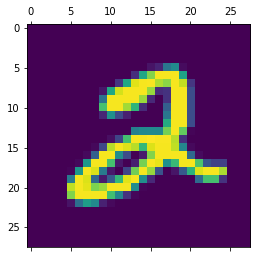

In [7]:
plt.matshow(X_train[5])

## These all are handwritten image

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Note y_train have values between 0 to 9

# Step1- Scale the values
* as values are between 0 to 255 o means black and 255 mean white, if we divide the values with 255 all values will be between 0 and 1


In [10]:
# X_train=X_train/255
# y_train=y_train/255

### For me scaling is giving very low accuracy

# Step-2
* Flatten the input image i.2 28*28 into 1 d matrix

In [11]:
X_train_flatten=X_train.reshape(len(X_train),-1)
X_train_flatten.shape

(60000, 784)

In [12]:
X_test_flatten=X_test.reshape(len(X_test),-1)
X_test_flatten.shape

(10000, 784)

In [13]:
len(X_train)

60000

In [14]:
X_train_flatten[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# Creating simple neural network

* Sequential- stack of layers in neural network
* dense- cross connections with all neurons
* 10- output neuron
* 784- input neuron
* sparse_categorical_crossentropy- It means our output class is categorial as we have ctaegories from 0-9 and sparse means our output category is an integer num, if its one hot encoded array we can use cross entropy loss 

In [15]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])
model.compile(
optimizer="adam",loss="sparse_categorical_crossentropy",
metrics=["accuracy"]
)

model.fit(X_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 9.6351 - accuracy: 0.8448
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 6.1681 - accuracy: 0.8778
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.7363 - accuracy: 0.8830
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.5352 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.4619 - accuracy: 0.8864


# Model evaluation test dataset

In [18]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.5125 - accuracy: 0.8901


[5.512479305267334, 0.8901000022888184]

# Prediction

In [20]:
y_pred=model.predict(X_test_flatten)
y_pred[0]

array([3.6610344e-28, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       9.9986076e-01, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [28]:
np.argmax(y_pred[5])

1

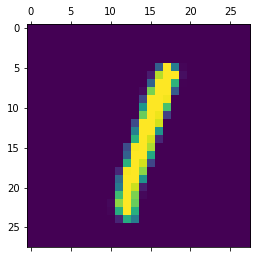

In [30]:
plt.matshow(X_test[5])

In [31]:
# lets see how many of them matches
y_pred_data=[np.argmax(i) for i in y_pred]
y_pred_data[:10]

[2, 0, 1, 0, 2, 1, 3, 1, 0, 3]

In [32]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [34]:
y_test.shape

(10000,)

In [38]:
type(y_pred_data)

list

In [33]:
## confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_data)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    3,    1,    1,    1,    0,    0,    0,    0],
       [   2, 1130,    2,    0,    0,    1,    0,    0,    0,    0],
       [ 239,  352,  438,    3,    0,    0,    0,    0,    0,    0],
       [ 113,  290,  438,  169,    0,    0,    0,    0,    0,    0],
       [  46,   85,  346,  229,  276,    0,    0,    0,    0,    0],
       [ 146,   41,  227,  355,   64,   59,    0,    0,    0,    0],
       [ 128,   29,  749,   15,   23,   13,    1,    0,    0,    0],
       [  57,  137,  388,  430,   13,    3,    0,    0,    0,    0],
       [  64,  360,  448,   63,   19,   20,    0,    0,    0,    0],
       [  27,   87,  271,  563,   59,    0,    1,    1,    0,    0]])>

#### since this confusion matrix is ghard to read we can plot a heatmap to see it clearly

Text(69.0, 0.5, 'Truth')

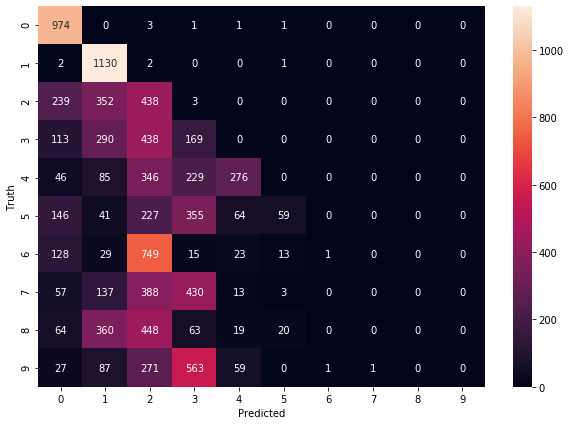

In [39]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel('Truth')

* Here 1130 times label 1 predicted true by our model also, 2 time model is predicted 0 ,2 times it is predicted 2 and so on

# Adding the hidden layeer

In [41]:
model = keras.Sequential([
      # adding the hidden layer with 100 neuron(any number), which will be less than 784 input_shape
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.6614 - accuracy: 0.8409
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3956 - accuracy: 0.9058
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3097 - accuracy: 0.9235
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2519 - accuracy: 0.9359
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2366 - accuracy: 0.9406


In [42]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2732 - accuracy: 0.9358


[0.2731650769710541, 0.9358000159263611]

In [43]:
# prediction
y_pred=model.predict(X_test_flatten)
y_pred_data=[np.argmax(i) for i in y_pred]

In [44]:
## confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_data)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    2,    1,    1,    0,    0,    3,    1,    6,    0],
       [  53, 1074,    2,    0,    0,    1,    0,    0,    5,    0],
       [ 301,  178,  526,    5,    1,    0,    1,    2,   17,    1],
       [ 535,  362,   15,   69,    0,    3,    0,    0,   26,    0],
       [ 608,  286,   15,    0,   42,    0,    6,    0,    9,   16],
       [ 706,   21,    2,   18,    0,  131,    1,    0,   12,    1],
       [ 737,    8,   45,    0,   48,   13,   92,    0,   15,    0],
       [  46,  272,  285,   19,    9,   18,    0,  354,   15,   10],
       [ 849,    9,    1,    5,    2,    3,    1,    1,  100,    3],
       [ 375,  387,   63,   22,   66,    5,    1,    2,   15,   73]])>

Text(69.0, 0.5, 'Truth')

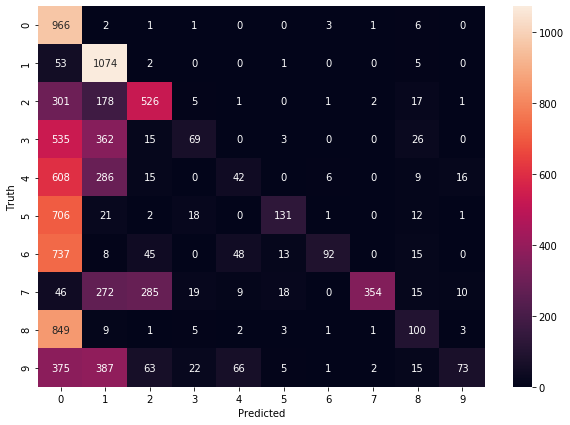

In [45]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel('Truth')

## * Adding more hidden layer
* changing sigmoid to softmax and instead of flatting the array manually we use "keras.layers.Flatten"
* Changing epochs to 10

In [55]:
## lets add one more layer
model = keras.Sequential([
      # adding the hidden layer with 100 neuron(any number), which will be less than 784 input_shape
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7872 - accuracy: 0.8690
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4078 - accuracy: 0.9139
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3016 - accuracy: 0.9299
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2249 - accuracy: 0.9428
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1775 - accuracy: 0.9527
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1483 - accuracy: 0.9594
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1312 - accuracy: 0.9636
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1211 - accuracy: 0.9668
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1135 - accuracy: 0.9688
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [54]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1761 - accuracy: 0.9572


[0.17609599232673645, 0.9571999907493591]

In [56]:
# prediction
y_pred=model.predict(X_test)
y_pred_data=[np.argmax(i) for i in y_pred]

In [57]:
## confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_data)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    1,    0,    2,    1,    8,    3,    0,    4,    1],
       [   0, 1115,    2,    3,    0,    2,    3,    0,   10,    0],
       [   2,    1,  964,   18,    6,    2,    1,    8,   30,    0],
       [   0,    0,    3,  981,    0,    8,    0,    7,   10,    1],
       [   1,    3,    1,    0,  941,    0,    5,    3,    1,   27],
       [   2,    0,    1,   17,    1,  847,    7,    1,   14,    2],
       [   1,    2,    1,    1,    4,    9,  937,    0,    3,    0],
       [   0,    2,    6,   10,    0,    2,    0,  995,    6,    7],
       [   5,    0,    2,   14,    5,    2,    4,    2,  936,    4],
       [   2,    4,    2,   14,    8,    4,    2,   14,   10,  949]])>

Text(69.0, 0.5, 'Truth')

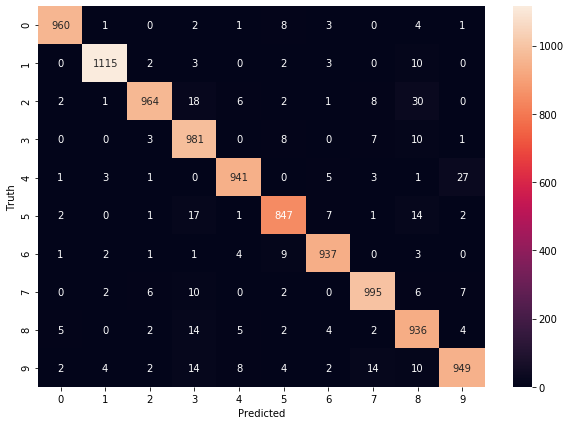

In [58]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel('Truth')

In [60]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [61]:
y_pred_data[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]